Reference image loaded, shape: (4026, 4026, 3)
Aerial image 1 loaded, shape: (639, 849, 3)
Aerial image 2 loaded, shape: (641, 853, 3)
Aerial image 3 loaded, shape: (643, 853, 3)
Aerial image 4 loaded, shape: (645, 862, 3)
Aerial image 5 loaded, shape: (628, 870, 3)
Aerial image 6 loaded, shape: (639, 854, 3)
Aerial image 7 loaded, shape: (644, 857, 3)
Aerial image 8 loaded, shape: (641, 853, 3)
Aerial image 9 loaded, shape: (647, 857, 3)
Aerial image 10 loaded, shape: (644, 857, 3)


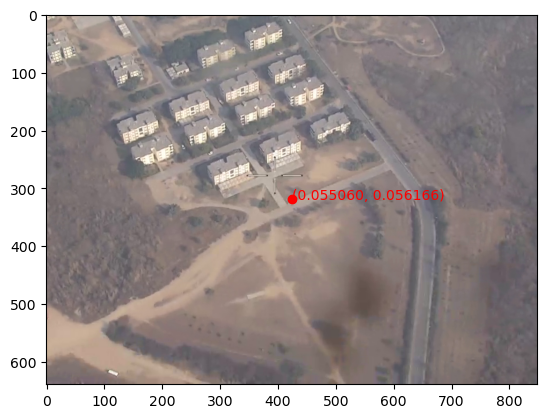

In [14]:
import cv2 # OpenCV library for image processing
import numpy as np # NumPy library for numerical operations
import matplotlib.pyplot as plt
# Step 1: Load images
reference_img = cv2.imread('reference1Km.tif') # Load the reference image
if reference_img is None:
    print(f'Reference image not loaded, please check the path.')
else:
    print(f'Reference image loaded, shape: {reference_img.shape}')
# Load the aerial images
aerial_imgs = []
for i in range(1, 11):
    img = cv2.imread(f'aerial{i}.png')
    if img is None:
        print(f'Aerial image {i} not loaded, please check the path.')
    else:
        print(f'Aerial image {i} loaded, shape: {img.shape}')
        aerial_imgs.append(img)
# Step 2: User selects an aerial image and clicks a pixel
# This step requires a GUI for image display and pixel selection, which is not shown here
# For the purpose of this example, let's assume the user selected the first aerial image and clicked the
selected_img = aerial_imgs[0]
x, y = selected_img.shape[1] // 2, selected_img.shape[0] // 2
# Step 3: Compute keypoints and descriptors
# You need to give option to try at least two different detectors/descriptor methods (e.g., SIFT, HOG, SU
# Here, we use ORB as an example
orb = cv2.ORB_create() # Initialize ORB detector
kp1, des1 = orb.detectAndCompute(reference_img, None) # Compute keypoints and descriptors for reference
kp2, des2 = orb.detectAndCompute(selected_img, None) # Compute keypoints and descriptors for selected ae
# Step 4: Compute Homography matrix
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True) # Initialize BFMatcher with Hamming distance and c
matches = bf.match(des1, des2) # Match descriptors between the two images
matches = sorted(matches, key=lambda x: x.distance) # Sort matches based on distance (lower is better)
src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2) # Get source points from r
dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2) # Get destination points f
H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0) # Compute Homography matrix using RANSAC
# Step 5: Using the H matrix project the clicked pixel location to reference image pixel location

clicked_location = np.array([x, y, 1]) # x, y are the coordinates of the clicked pixel
projected_location = np.dot(H, clicked_location) # Project clicked location to reference image using Hom
projected_location = projected_location / projected_location[2] # Normalize the projected location
# Step 6: Using interpolation or simply rounding get the latitude and longitude of the projected pixel
# This step requires knowledge about the geographical location and scale of the reference image
# For the purpose of this example, let's assume the reference image covers an area from (0, 0) to (1, 1)
lat, lon = projected_location[1] / reference_img.shape[0], projected_location[0] / reference_img.shape[1]
# Step 7: Display the clicked location coordinate to users
# This step requires a GUI for displaying the coordinate on the image
# For the purpose of this example, let's display the coordinate using Matplotlib
plt.imshow(cv2.cvtColor(selected_img, cv2.COLOR_BGR2RGB))
plt.plot(x, y, 'ro') # Plot the clicked location
plt.text(x, y, f'({lat:.6f}, {lon:.6f})', color='red') # Display the coordinate
plt.show()